# 4.1 Confusion Matrix
A confusion matrix is a quick way to compare the labels, a model predicts and the actual labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

In [2]:
# Read the datasets
heart_disease = pd.read_csv("heart-disease.csv")

In [3]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
## Import the Random Forest Classifier estimator class
from sklearn.ensemble import RandomForestClassifier
## Import random seed
np.random.seed(42)
## Createing the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

In [12]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

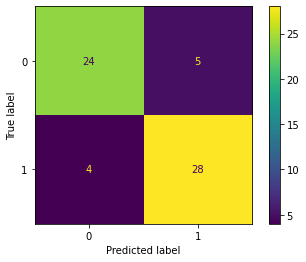

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

In [21]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# What are these?
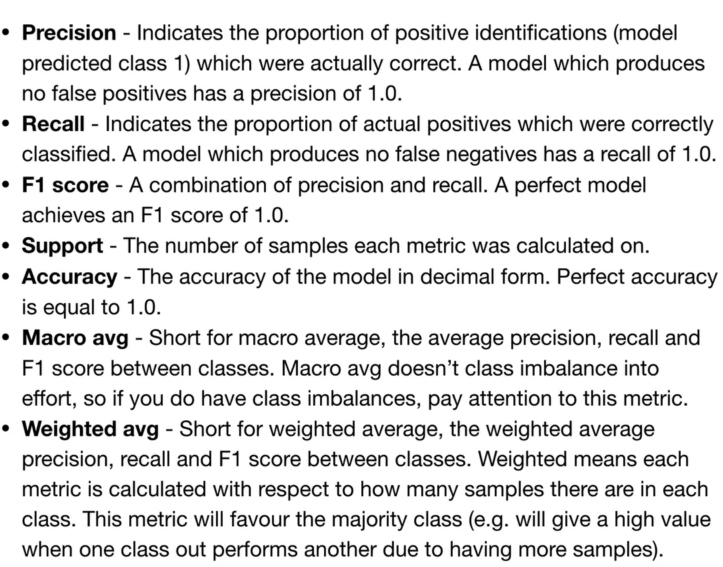

<AxesSubplot:>

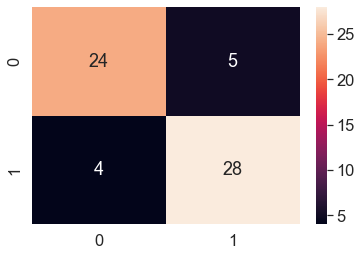

In [19]:
# Or you can use seaborn for visualizing

import seaborn as sns
# create confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat, annot=True)

In [22]:
pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.857143,0.848485,0.852459,0.852814,0.852601
recall,0.827586,0.875000,0.852459,0.851293,0.852459
f1-score,0.842105,0.861538,0.852459,0.851822,0.852300
support,29.000000,32.000000,0.852459,61.000000,61.000000


## Summerizing the classification metrics

* `Accuracy` is a good measure to start with if all calases are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* `Precision` and `recall` become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for hisher recall.
* `F1-score` is combination of precision and recall.